In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #Regular Expressions
import string #importing string functions
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer

In [2]:
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc, precision_score,recall_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [3]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
df['Title'] = df['Title'].fillna('')

df['Review Text'] = df['Review Text'].fillna('')

df['text_comb'] = df['Title'] + '. ' + df['Review Text']

In [5]:
df1 = df[['text_comb','Rating']]
df1

,text_comb,Rating
0,. Absolutely wonderful - silky and sexy and co...,4
1,. Love this dress! it's sooo pretty. i happe...,5
2,Some major design flaws. I had such high hopes...,3
3,"My favorite buy!. I love, love, love this jump...",5
4,Flattering shirt. This shirt is very flatterin...,5
...,...,...
23481,Great dress for many occasions. I was very hap...,5
23482,Wish it was made of cotton. It reminds me of m...,3
23483,"Cute, but see through. This fit well, but the ...",3
23484,"Very cute dress, perfect for summer parties an...",3


In [6]:
df1['text_comb'] = df1['text_comb'].astype('unicode')

In [7]:
df1['Rating'] = df1['Rating'].map({5: 1, 4: 1, 3:0, 2:0, 1:0})

In [8]:
df1

,text_comb,Rating
0,. Absolutely wonderful - silky and sexy and co...,1
1,. Love this dress! it's sooo pretty. i happe...,1
2,Some major design flaws. I had such high hopes...,0
3,"My favorite buy!. I love, love, love this jump...",1
4,Flattering shirt. This shirt is very flatterin...,1
...,...,...
23481,Great dress for many occasions. I was very hap...,1
23482,Wish it was made of cotton. It reminds me of m...,0
23483,"Cute, but see through. This fit well, but the ...",0
23484,"Very cute dress, perfect for summer parties an...",0


In [9]:
df1.Rating.isna().sum()

0

In [10]:
df1.isna().sum()

text_comb    0
Rating       0
dtype: int64

In [11]:
print("Before dropping text_df: ",df1.shape)
df1.drop_duplicates(inplace = True)
print("After dropping text_df: ",df1.shape)

Before dropping text_df:  (23486, 2)
After dropping text_df:  (22639, 2)


In [12]:
df1["Rating"].value_counts()

1    17445
0     5194
Name: Rating, dtype: int64

<Axes: ylabel='Rating'>

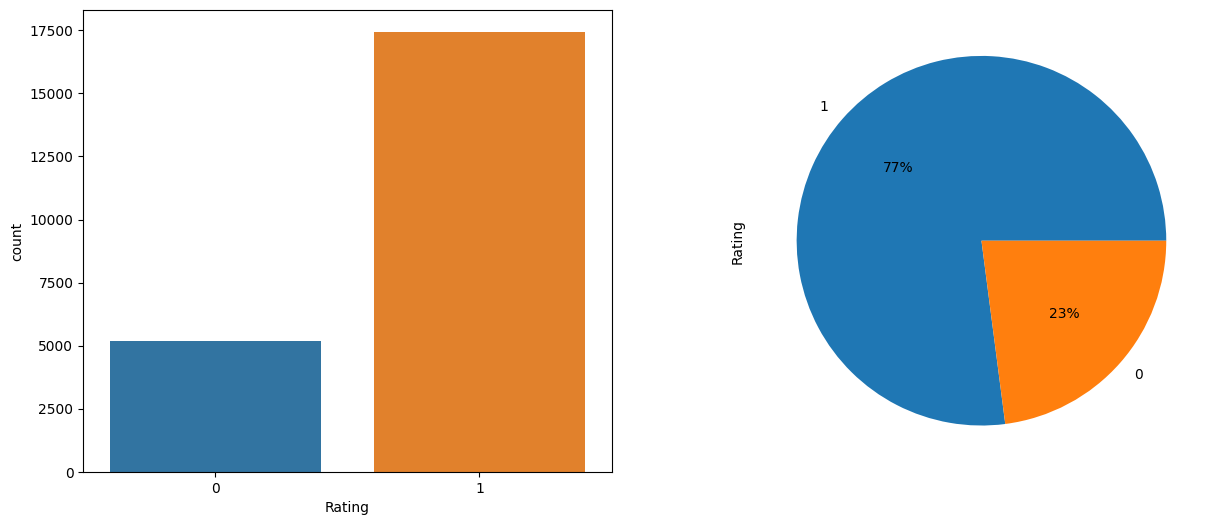

In [13]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df1['Rating'])
plt.subplot(1, 2, 2)
df1['Rating'].value_counts().plot.pie(autopct='%1.0f%%')

In [14]:
import plotly.express as px

FreqOfWords =df1['text_comb'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1500, height=700)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [15]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = df1[(df1['Rating']==1)]
df_minority = df1[(df1['Rating']==0)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=20000 , # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [16]:
df_upsampled.groupby(['Rating']).count()


,text_comb
Rating,
0,20000
1,17445


In [17]:
df_upsampled

,text_comb,Rating
3880,Does not have a straight line fit. The fabric ...,0
23482,Wish it was made of cotton. It reminds me of m...,0
17105,Weird construction. I liked the design and i d...,0
14078,There is no care instructions sewn into this g...,0
2007,In agreement with other reviewers.... This is ...,0
...,...,...
23476,Cheeky!. These bottoms are very cute but defia...,1
23477,Entrancing. I'm so impressed with the beautifu...,1
23479,What a fun piece!. So i wasn't sure about orde...,1
23481,Great dress for many occasions. I was very hap...,1


<Axes: ylabel='Rating'>

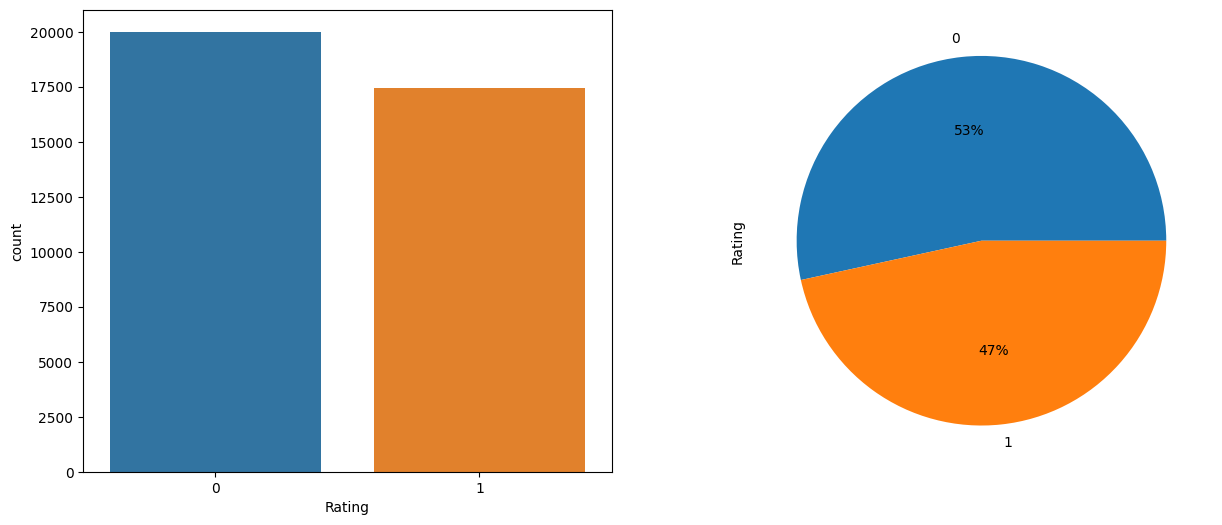

In [18]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df_upsampled['Rating'])
plt.subplot(1, 2, 2)
df_upsampled['Rating'].value_counts().plot.pie(autopct='%1.0f%%')

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_upsampled['text_comb'],
                                                    df_upsampled['Rating'],
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df_upsampled.shape[0]))
print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the total set: 37445
Number of rows in the training set: 28083
Number of rows in the test set: 9362


In [21]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(x_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(x_test)

In [22]:
training_data

<28083x13402 sparse matrix of type '<class 'numpy.int64'>'
	with 1257045 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data.toarray(), y_train)

MultinomialNB()

In [24]:
training_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
predictions = naive_bayes.predict(testing_data.toarray())

In [26]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.8943601794488357
Precision score:  0.911404796867352
Recall score:  0.8558951965065502
F1 score:  0.8827782387104421


In [27]:
test1=["I was disappointed with my experience shopping on this ecommerce clothing website. The product images were misleading, as the actual items I received looked vastly different from what was depicted online. Additionally, the quality of the clothes was subpar, with loose threads and poor stitching. Customer service was unresponsive when I reached out to address these issues, leaving me frustrated and dissatisfied. I would caution others before making any purchases from this platform.",
       "I absolutely love shopping on this ecommerce clothing platform! The website is user-friendly, making it easy to navigate and find exactly what I'm looking for. The variety of clothing options is impressive, and the quality of the items I've purchased has been outstanding. The delivery is always prompt, and their customer service team is incredibly helpful and responsive. I highly recommend this platform for all your clothing needs!",
       "I've had a great experience with this ecommerce clothing store. The prices are affordable, and they often have fantastic sales and discounts. The website provides detailed product descriptions and accurate sizing information, which has helped me make informed purchasing decisions. The checkout process is smooth, and the items always arrive well-packaged and in excellent condition. Overall, I'm extremely satisfied with my purchases from this platform."]

In [28]:
test2=count_vector.transform(test1)

In [29]:
test2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
test2=count_vector.transform(test1)


In [31]:
res=naive_bayes.predict(test2.toarray())

In [32]:
for i in res:
  if i==0:
    print("Negative")
  else:
    print("positive")

Negative
positive
positive


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(training_data, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.93
Best parameters:  {'C': 10}


In [36]:
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression with the desired 'C' value
logreg = LogisticRegression(C=10, max_iter=1000)

# Fit the model to the training data
logreg.fit(training_data, y_train)

# Predict on the test data
y_pred = logreg.predict(testing_data)

Confusion Matrix: 
Accuracy score:  0.9322794274727623
Precision score:  0.9675471698113207
Recall score:  0.8839347276488163
F1 score:  0.9238529906317559


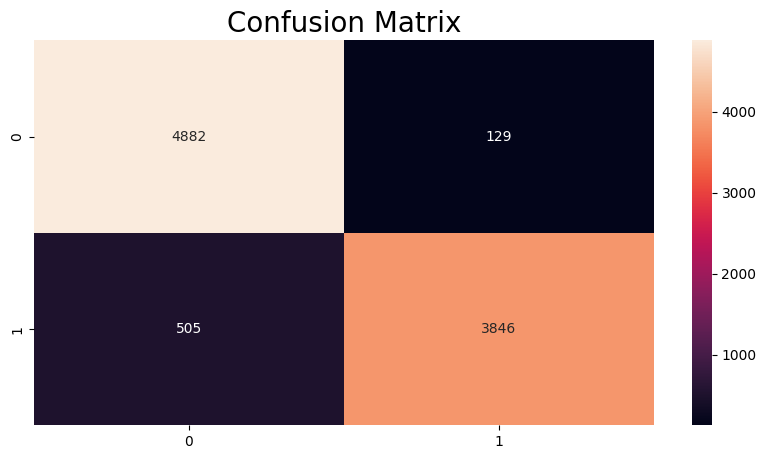

In [37]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

In [38]:
test1=["I was disappointed with my experience shopping on this ecommerce clothing website. The product images were misleading, as the actual items I received looked vastly different from what was depicted online. Additionally, the quality of the clothes was subpar, with loose threads and poor stitching. Customer service was unresponsive when I reached out to address these issues, leaving me frustrated and dissatisfied. I would caution others before making any purchases from this platform.",
       "I absolutely love shopping on this ecommerce clothing platform! The website is user-friendly, making it easy to navigate and find exactly what I'm looking for. The variety of clothing options is impressive, and the quality of the items I've purchased has been outstanding. The delivery is always prompt, and their customer service team is incredibly helpful and responsive. I highly recommend this platform for all your clothing needs!",
       "I've had a great experience with this ecommerce clothing store. The prices are affordable, and they often have fantastic sales and discounts. The website provides detailed product descriptions and accurate sizing information, which has helped me make informed purchasing decisions. The checkout process is smooth, and the items always arrive well-packaged and in excellent condition. Overall, I'm extremely satisfied with my purchases from this platform."]

In [39]:
test2=count_vector.transform(test1)

In [40]:
test2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
res2=logreg.predict(test2.toarray())

In [42]:
for i in res2:
  if i==0:
    print("Negative")
  else:
    print("positive")

Negative
positive
positive


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:

# Create a dictionary of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(training_data, y_train)

# Retrieve the best model and its hyperparameters
print(grid_search.best_estimator_)
print(grid_search.best_params_)



DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [45]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data
dt_classifier.fit(training_data, y_train)

# Predict on the test data
y_pred3 = dt_classifier.predict(testing_data)

Confusion Matrix: 
Accuracy score:  0.9105960264900662
Precision score:  0.9675359233634913
Recall score:  0.8356699609285222
F1 score:  0.8967813540510544


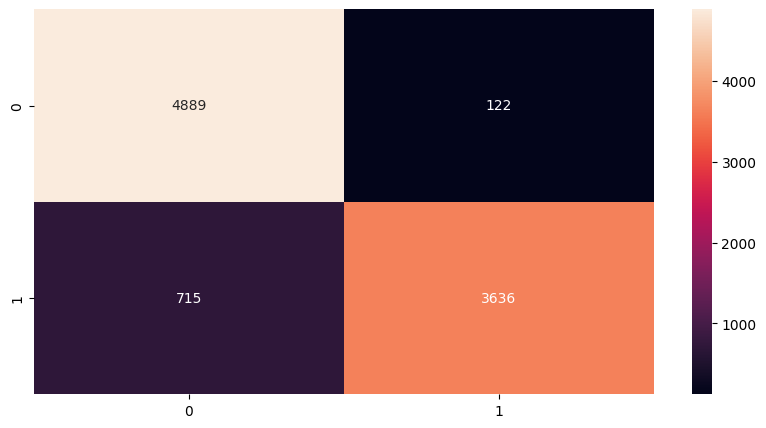

In [46]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='g');
print('Accuracy score: ', format(accuracy_score(y_test, y_pred3)))
print('Precision score: ', format(precision_score(y_test, y_pred3)))
print('Recall score: ', format(recall_score(y_test, y_pred3)))
print('F1 score: ', format(f1_score(y_test, y_pred3)))

In [47]:
test1=["I was disappointed with my experience shopping on this ecommerce clothing website. The product images were misleading, as the actual items I received looked vastly different from what was depicted online. Additionally, the quality of the clothes was subpar, with loose threads and poor stitching. Customer service was unresponsive when I reached out to address these issues, leaving me frustrated and dissatisfied. I would caution others before making any purchases from this platform.",
       "I absolutely love shopping on this ecommerce clothing platform! The website is user-friendly, making it easy to navigate and find exactly what I'm looking for. The variety of clothing options is impressive, and the quality of the items I've purchased has been outstanding. The delivery is always prompt, and their customer service team is incredibly helpful and responsive. I highly recommend this platform for all your clothing needs!",
       "I've had a great experience with this ecommerce clothing store. The prices are affordable, and they often have fantastic sales and discounts. The website provides detailed product descriptions and accurate sizing information, which has helped me make informed purchasing decisions. The checkout process is smooth, and the items always arrive well-packaged and in excellent condition. Overall, I'm extremely satisfied with my purchases from this platform."]

In [48]:
test2=count_vector.transform(test1)

In [49]:
test2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
res3=dt_classifier.predict(test2.toarray())

In [51]:
for i in res3:
  if i==0:
    print("Negative")
  else:
    print("positive")

Negative
positive
positive


In [52]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

# Define the estimator
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Define the scoring function
scoring = 'accuracy' # proportion of correctly classified samples

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search on the data
# load or generate training data
grid_search.fit(training_data, y_train)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9523910739528507


In [56]:
rf =  RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)

# Train the classifier on your training data
rf.fit(training_data, y_train)

# Use the trained classifier to make predictions on your test data
y_pred4 = rf.predict(testing_data)

Confusion Matrix: 
Accuracy score:  0.9645374919888913
Precision score:  0.9769760265843817
Recall score:  0.9459894277177661
F1 score:  0.9612330686595049


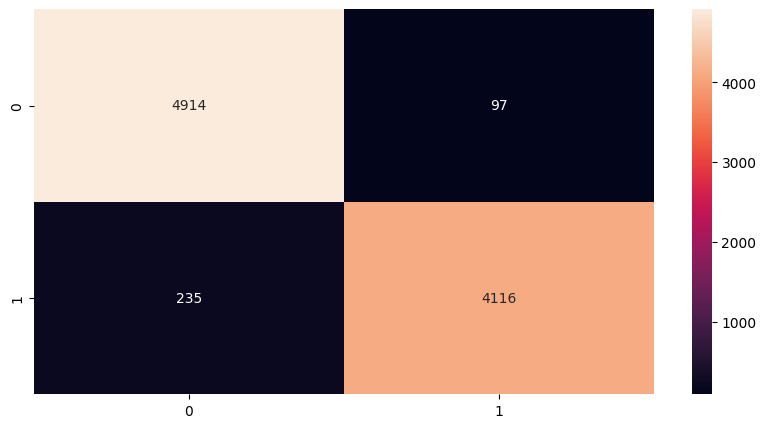

In [57]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt='g');
print('Accuracy score: ', format(accuracy_score(y_test, y_pred4)))
print('Precision score: ', format(precision_score(y_test, y_pred4)))
print('Recall score: ', format(recall_score(y_test, y_pred4)))
print('F1 score: ', format(f1_score(y_test, y_pred4)))

In [63]:
test4=["I was disappointed with my experience shopping on this ecommerce clothing website. The product images were misleading, as the actual items I received looked vastly different from what was depicted online. Additionally, the quality of the clothes was subpar, with loose threads and poor stitching. Customer service was unresponsive when I reached out to address these issues, leaving me frustrated and dissatisfied. I would caution others before making any purchases from this platform.",
       "I absolutely love shopping on this ecommerce clothing platform! The website is user-friendly, making it easy to navigate and find exactly what I'm looking for. The variety of clothing options is impressive, and the quality of the items I've purchased has been outstanding. The delivery is always prompt, and their customer service team is incredibly helpful and responsive. I highly recommend this platform for all your clothing needs!",
       "I've had a great experience with this ecommerce clothing store. The prices are affordable, and they often have fantastic sales and discounts. The website provides detailed product descriptions and accurate sizing information, which has helped me make informed purchasing decisions. The checkout process is smooth, and the items always arrive well-packaged and in excellent condition. Overall, I'm extremely satisfied with my purchases from this platform."]

In [64]:
test4=count_vector.transform(test4)
res4=dt_classifier.predict(test4.toarray())

In [65]:
for i in res4:
  if i==0:
    print("Negative")
  else:
    print("positive")

Negative
positive
positive
